In [148]:
import zipfile

In [149]:
with zipfile.ZipFile('Dataset.zip','r') as zip_ref:
    zip_ref.extractall()

In [150]:
# importing keras library
import keras

# importing ImageDataGenerator class from keras
from keras.preprocessing.image import ImageDataGenerator

In [151]:
# Defining Parameters and Arguments for ImageDataGenerator Class
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=180,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [152]:
# Applying ImageDataGenerator functionality to trainset
x_train = train_datagen.flow_from_directory('Dataset/train_set',
                                            target_size= (128,128),
                                            batch_size=32,
                                            class_mode='binary')

Found 436 images belonging to 2 classes.


In [153]:
# Applying ImageDataGenerator functionality to testset
x_test = test_datagen.flow_from_directory('Dataset/test_set',
                                          target_size= (128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 121 images belonging to 2 classes.


In [154]:
# Importing Model Building Libraries
from keras.models import Sequential

from keras.layers import Dense

from keras.layers import Convolution2D

from keras.layers import MaxPooling2D

from keras.layers import Flatten

In [155]:
import warnings

warnings.filterwarnings('ignore')

In [156]:
# Initializing The Model
model = Sequential()

In [157]:
#add Convolutional Layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [158]:
# add MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [159]:
# add Flatten Layer
model.add(Flatten())

In [160]:
# add hidden layer
model.add(Dense(150,activation='relu'))

In [161]:
# add Output Layer
model.add(Dense(1,activation='sigmoid'))

In [162]:
#Configuring The Learning Process

model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [163]:
# Training The Model
model.fit_generator(x_train,
                    steps_per_epoch=14,
                    epochs=10,
                    validation_data=x_test,
                    validation_steps=4)

Epoch 1/10
14/14 [==============================] - 20s 1s/step - loss: 5.5338 - accuracy: 0.5986 - val_loss: 0.5579 - val_accuracy: 0.8017
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.8483 - accuracy: 0.7454 - val_loss: 0.2021 - val_accuracy: 0.9339
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.2596 - accuracy: 0.8670 - val_loss: 0.1073 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 16s 1s/step - loss: 0.1766 - accuracy: 0.9335 - val_loss: 0.0808 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 0.1610 - accuracy: 0.9266 - val_loss: 0.0703 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.1668 - accuracy: 0.9266 - val_loss: 0.0629 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.1642 - accuracy: 0.9243 - val_loss: 0.0615 - val_accuracy: 0.9752
Epoch 8/10
14/14 [==

In [164]:
# Save The Model
model.save("forest1.f5")

INFO:tensorflow:Assets written to: forest1.f5\assets


INFO:tensorflow:Assets written to: forest1.f5\assets


In [165]:
#importing necessary libraries for predictions
from keras.models import load_model

from tensorflow.keras.preprocessing import image

import numpy as np

import cv2

In [166]:
# load the saved model
model = load_model("forest1.f5")

In [167]:
#random image path
img=image.load_img('Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [168]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 54ms/step


array([[1.]], dtype=float32)

In [169]:
 pip install twilio

In [170]:
pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [171]:
pip install pygobject

  Using cached PyGObject-3.42.2.tar.gz (719 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pycairo-1.21.0-cp39-cp39-win_amd64.whl (1.3 MB)
Failed to build pygobject
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\haris\anaconda3\python.exe' 'C:\Users\haris\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\haris\AppData\Local\Temp\tmp13dj6pir'
       cwd: C:\Users\haris\AppData\Local\Temp\pip-install-3jtrj84s\pygobject_283ada462819455f83005393e82378ee
  Complete output (47 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pygtkcompat
  copying pygtkcompat\generictreemodel.py -> build\lib.win-amd64-cpython-39\pygtkcompat
  copying pygtkcompat\pygtkcompat.py -> build\lib.win-amd64-cpython-39\pygtkcompat
  copying pygtkcompat\__init__.py -> build\lib.win-amd64-cpython-39\pygtkcompat
  creating build\lib.win-amd64-cpython-39\gi
  copying gi\docstring.py -> build\lib.win-amd64-cpython-39\gi
  copying gi\importer.py -> build\lib.win-amd64-cpython-39\gi
  copying gi\module.

In [172]:
# Importing Libraries

import cv2

import numpy as np

from keras.preprocessing import image

from keras.models import load_model

from twilio.rest import Client

from playsound import playsound

In [173]:
# load the saved model
model = load_model(r'forest1.f5')

In [174]:
#define video
video = cv2.VideoCapture(0)

In [175]:
#define the features
name = ['forest','with fire']

In [176]:
# twilio account sid
account_sid = 'AC5e0a0a1b5c0b23fe59220dd0c8372c80'
# twilio account authentication token
auth_token = 'ffe12272bb92a9e4067310e5de26b102'

client = Client(account_sid, auth_token)
message = client.messages\
.create(
    body ='Forest Fire is detected, stay alert',
    #using twilio free number
    from_='+1 479 397 4248',
    #to number
    to='+91 73587 24469')
print(message.sid)

SM71b649f77bc058e47d0634102cac3da3


In [177]:
import tensorflow as tf

In [178]:
import cv2

import numpy as np

from keras.preprocessing import image

from keras.models import load_model

from twilio.rest import Client

from playsound import playsound

video = cv2.VideoCapture(0)
name = ['forest','with fire']

In [179]:
video.isOpened()

True

In [180]:
from tensorflow.keras.preprocessing import image

In [181]:
from IPython.display import Audio
from IPython import display

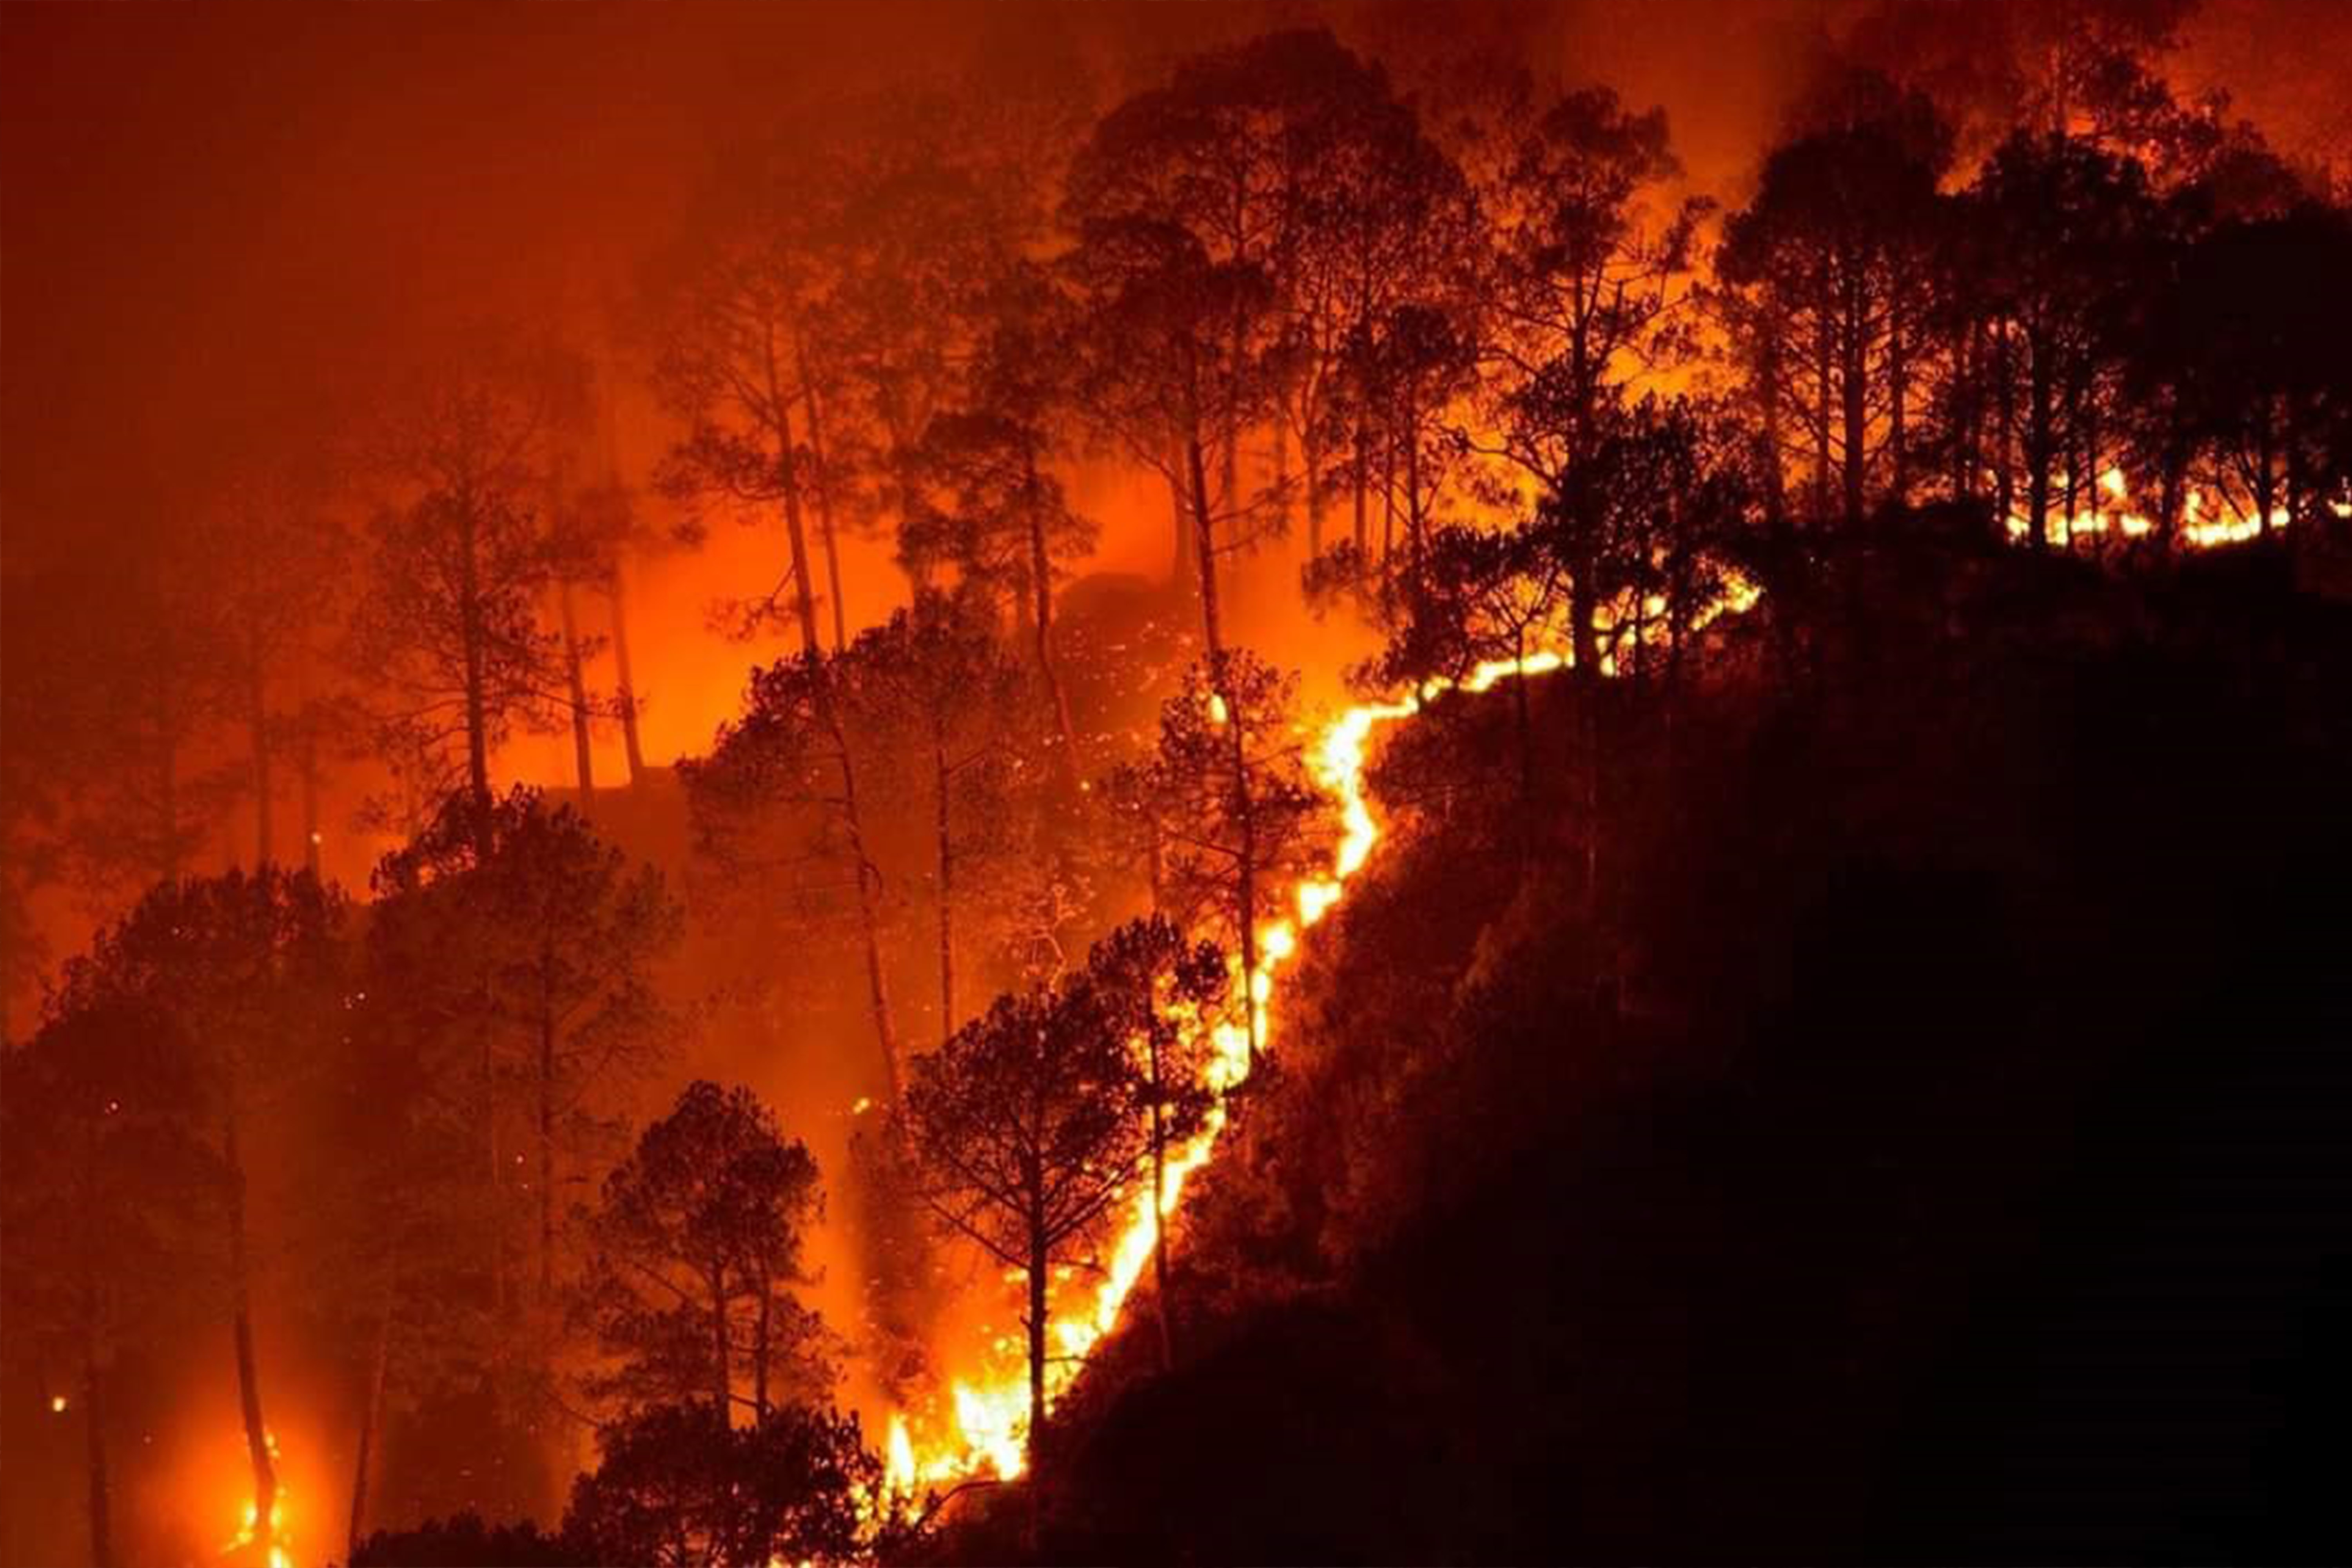

In [182]:
display.Image("Bandipur_fires_2019.jpg")

In [183]:
while(video.isOpened()):
  success,frame=video.read()
  cv2.imwrite("Bandipur_fires_2019.jpg.jpg",frame)
  img=image.load_img("Bandipur_fires_2019.jpg",target_size=(128,128))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  pred=model.predict(x)
  p=pred[0]
  print(pred)
  cv2.putText(frame,"predicted class = ",(100,100),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
  if pred[0]==1:
    account_sid='AC5e0a0a1b5c0b23fe59220dd0c8372c80'
    auth_token='ffe12272bb92a9e4067310e5de26b102'
    client=Client(account_sid,auth_token)
    message=client.messages \
    .create(
        body="Forest fire is detected ,stay alert",
        from_='+1 479 397 4248',
        to='+91 73587 24469')
    print(message.sid)
    print('Fire detected')
    print('SMS sent')
    break
  else:
    print('No danger')
    break
  if cv2.waitKey(1) & 0xFF==ord('a'):
    break
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 58ms/step
[[1.]]
SM8c19b63cba145fcabafbe24a7ae86024
Fire detected
SMS sent
